In [1]:
!pip install pandas

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel("C:/Users/Sujal/Downloads/archive (1)/Data_Train.xlsx")


In [37]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [38]:
df.shape

(10683, 11)

In [39]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [40]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [42]:
df['Total_Stops'] = df['Total_Stops'].fillna(df['Total_Stops'].mode()[0])
df['Route'] = df['Route'].fillna(df['Route'].mode()[0])


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10683 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10683 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [44]:
df.drop(columns=['Additional_Info'], errors='ignore', inplace=True)


In [45]:
df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'], format='%d/%m/%Y')


In [46]:
df['Journey_day'] = df['Date_of_Journey'].dt.day_name()
df['Journey_month'] = df['Date_of_Journey'].dt.month_name()

In [47]:
df['Dep_Time'] = pd.to_datetime(df['Dep_Time'], format='%H:%M')
df['Dep_hour'] = df['Dep_Time'].dt.hour
df['Dep_minute'] = df['Dep_Time'].dt.minute


In [48]:
df['Arrival_Time'] = df['Arrival_Time'].apply(lambda x: x.split(' ')[0])

In [49]:
df['Arrival_hour'] = pd.to_datetime(df['Arrival_Time'], format='%H:%M').dt.hour
df['Arrival_minute'] = pd.to_datetime(df['Arrival_Time'], format='%H:%M').dt.minute

In [64]:
df['Total_Stops'] = df['Total_Stops'].replace({
    'non-stop': 0,
    '1 stop': 1,
    '2 stops': 2,
    '3 stops': 3,
    '4 stops': 4
})



In [51]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,1900-01-01 22:20:00,01:10,2h 50m,0,3897,Sunday,March,22,20,1,10
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,1900-01-01 05:50:00,13:15,7h 25m,2,7662,Wednesday,May,5,50,13,15
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,1900-01-01 09:25:00,04:25,19h,2,13882,Sunday,June,9,25,4,25
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,1900-01-01 18:05:00,23:30,5h 25m,1,6218,Sunday,May,18,5,23,30
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,1900-01-01 16:50:00,21:35,4h 45m,1,13302,Friday,March,16,50,21,35


In [52]:
print("Average price by airline:")
print(df.groupby('Airline')['Price'].mean().sort_values(ascending=False))


Average price by airline:
Airline
Jet Airways Business                 58358.666667
Jet Airways                          11643.923357
Multiple carriers Premium economy    11418.846154
Multiple carriers                    10902.678094
Air India                             9611.210616
Vistara Premium economy               8962.333333
Vistara                               7796.348643
GoAir                                 5861.056701
IndiGo                                5673.682903
Air Asia                              5590.260188
SpiceJet                              4338.284841
Trujet                                4140.000000
Name: Price, dtype: float64


In [53]:
print("\nAverage price by number of stops:")
print(df.groupby('Total_Stops')['Price'].mean().sort_values(ascending=False))



Average price by number of stops:
Total_Stops
4    17686.000000
3    13112.000000
2    12715.807895
1    10593.570032
0     5024.900315
Name: Price, dtype: float64


In [54]:
print("\nTop 5 most expensive routes:")
print(df.groupby('Route')['Price'].mean().sort_values(ascending=False).head(5))


Top 5 most expensive routes:
Route
BOM → DED → DEL → HYD    24115.0
BOM → JDH → DEL → HYD    23867.0
BOM → VNS → DEL → HYD    23528.0
BOM → UDR → DEL → HYD    22950.0
BOM → BDQ → DEL → HYD    22792.5
Name: Price, dtype: float64


In [55]:
print("Flights per day :")
print(df['Journey_day'].value_counts().sort_values(ascending=False))

Flights per day :
Journey_day
Wednesday    2079
Monday       1850
Thursday     1832
Saturday     1670
Sunday       1474
Friday        909
Tuesday       869
Name: count, dtype: int64


In [56]:
print("Flights per month :")
print(df['Journey_month'].value_counts().sort_values(ascending=False))

Flights per month :
Journey_month
May      3466
June     3414
March    2724
April    1079
Name: count, dtype: int64


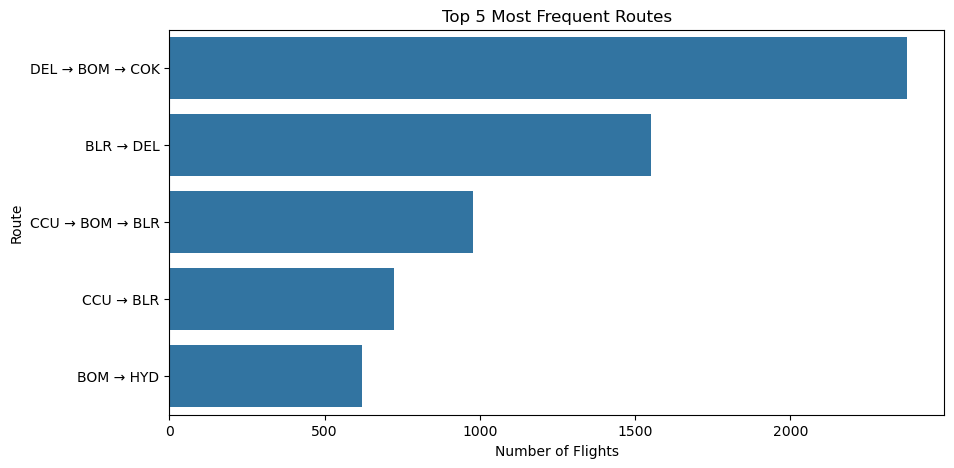

In [66]:
top_routes = df['Route'].value_counts().head(5)
plt.figure(figsize=(10,5))
sns.barplot(x=top_routes.values, y=top_routes.index)
plt.title("Top 5 Most Frequent Routes")
plt.xlabel("Number of Flights")
plt.ylabel("Route")
plt.show()

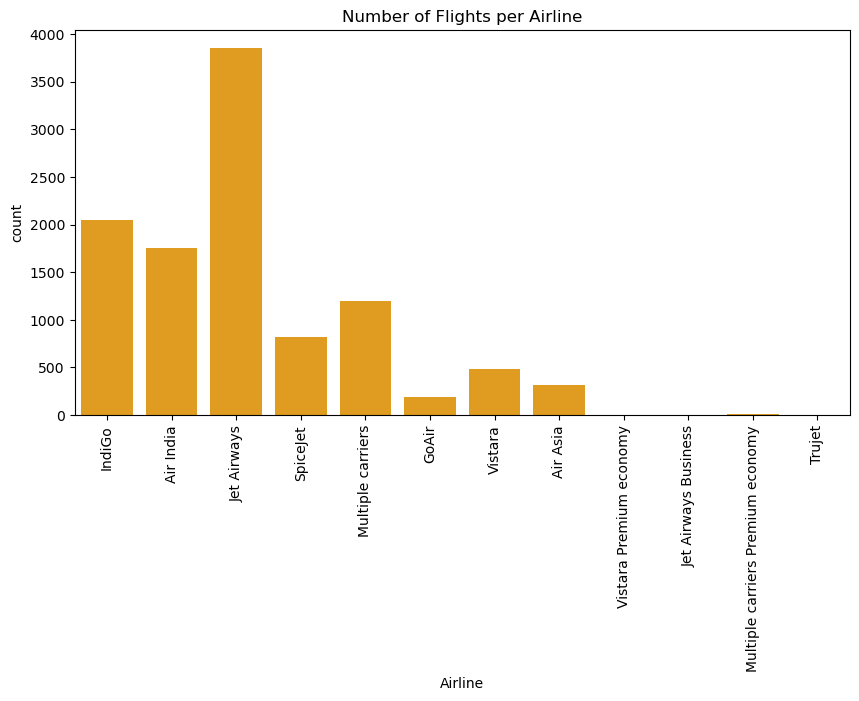

In [58]:
plt.figure(figsize=(10,5))
sns.countplot(x='Airline', data=df, color='orange')
plt.xticks(rotation=90)
plt.title("Number of Flights per Airline")
plt.show()


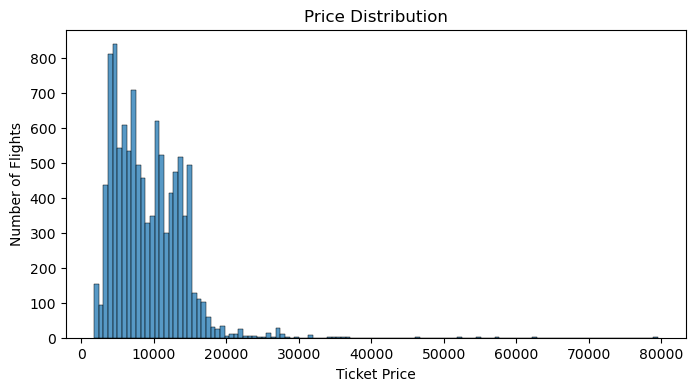

In [59]:
plt.figure(figsize=(8,4))
sns.histplot(df['Price'])
plt.title("Price Distribution")
plt.xlabel("Ticket Price")
plt.ylabel("Number of Flights")
plt.show()


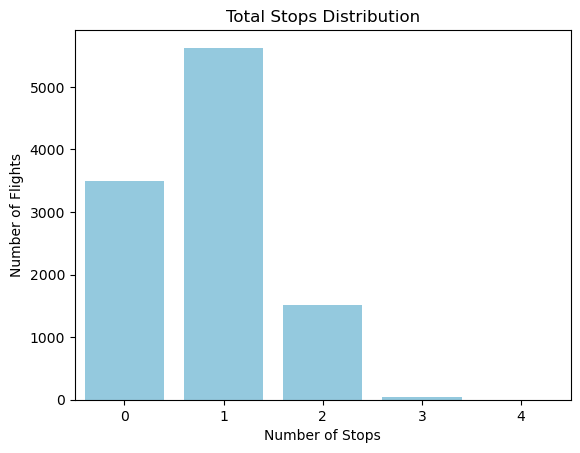

In [60]:
sns.countplot(x='Total_Stops', data=df,color='skyblue')
plt.title("Total Stops Distribution")
plt.xlabel("Number of Stops")
plt.ylabel("Number of Flights")
plt.show()

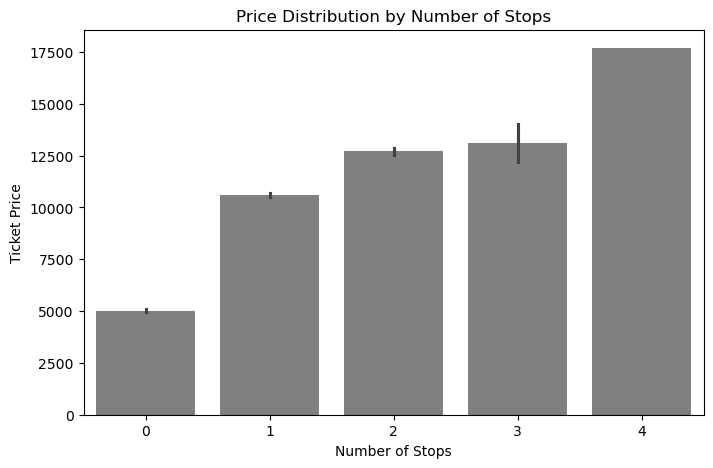

In [61]:
plt.figure(figsize=(8,5))
sns.barplot(x='Total_Stops', y='Price', data=df, color='grey')
plt.title("Price Distribution by Number of Stops")
plt.xlabel("Number of Stops")
plt.ylabel("Ticket Price")
plt.show()

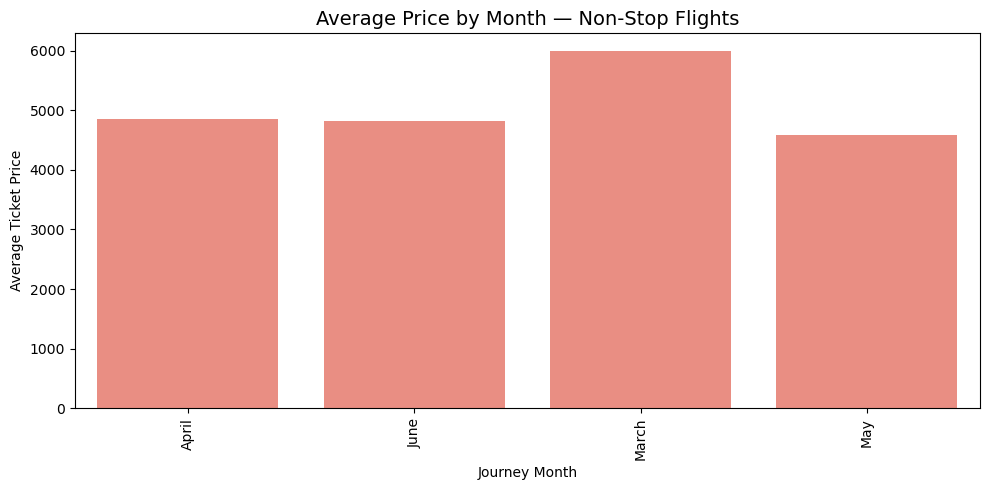

In [65]:
df_nonstop = df[df['Total_Stops'] == 0]
plt.figure(figsize=(10,5))
month_avg_ns = df_nonstop.groupby('Journey_month')['Price'].mean().reset_index()
sns.barplot(data=month_avg_ns, x='Journey_month', y='Price', color='salmon')
plt.title("Average Price by Month — Non-Stop Flights")
plt.xlabel("Journey Month")
plt.ylabel("Average Ticket Price")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()
